IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set_style("whitegrid")

C:\Users\Shreyas\anaconda3\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


DEFINING BASIC VARIABLES

Choosing 5 high performing stocks from different sectors so that there is as little correlation between them as possible

In [2]:
NUM_TRADING_DAYS = 252

NUM_SIMULATIONS = 100000

# stocks = ["HDFCBANK.NS", "ICICIBANK", "INFY.NS", "RELIANCE.NS", "TCS.NS", "ITC.NS", "TATAMOTORS.NS", "TATASTEEL.NS", "ADANIENT.NS", "ASIANPAINT.NS"]
# You can get innovative by choosing different stocks

stocks = ["GHCL.NS","IDFCFIRSTB.NS","TATAMOTORS.NS","NH.NS","EMAMILTD.NS"]

start_date = "2015-10-01"
end_date = "2023-10-01"


PULLING THE DATA AND FORMING A DATABASE

In [3]:
stock_data = {}

for stock in stocks:
    ticker = yf.Ticker(stock)
    stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']

stock_prices = pd.DataFrame(stock_data)

stock_prices

,GHCL.NS,IDFCFIRSTB.NS,TATAMOTORS.NS,NH.NS,EMAMILTD.NS
Date,,,,,
2015-10-01 00:00:00+05:30,115.294250,NaN,296.704712,NaN,515.869873
2015-10-05 00:00:00+05:30,117.766037,NaN,314.043610,NaN,533.150696
2015-10-06 00:00:00+05:30,116.676788,NaN,332.528534,NaN,513.712708
2015-10-07 00:00:00+05:30,117.388977,NaN,340.151672,NaN,517.565002
2015-10-08 00:00:00+05:30,114.372581,NaN,342.045013,NaN,512.369934
...,...,...,...,...,...
2023-09-25 00:00:00+05:30,617.849976,94.300003,618.700012,1062.050049,506.480377
2023-09-26 00:00:00+05:30,620.549988,95.550003,619.799988,1067.800049,511.299744
2023-09-27 00:00:00+05:30,622.150024,97.550003,620.150024,1081.900024,503.578857


CALCULATING LOG-RETURNS AND ADDING THAT DATA

In [4]:
log_returns = np.log(stock_prices[1:]/stock_prices[1:].shift(1)) 

log_returns 

,GHCL.NS,IDFCFIRSTB.NS,TATAMOTORS.NS,NH.NS,EMAMILTD.NS
Date,,,,,
2015-10-05 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN
2015-10-06 00:00:00+05:30,-0.009292,NaN,0.057194,NaN,-0.037140
2015-10-07 00:00:00+05:30,0.006085,NaN,0.022666,NaN,0.007471
2015-10-08 00:00:00+05:30,-0.026032,NaN,0.005551,NaN,-0.010088
2015-10-09 00:00:00+05:30,-0.021100,NaN,0.037735,NaN,-0.004392
...,...,...,...,...,...
2023-09-25 00:00:00+05:30,-0.017965,0.007451,-0.002825,0.000565,-0.004456
2023-09-26 00:00:00+05:30,0.004360,0.013168,0.001776,0.005399,0.009470
2023-09-27 00:00:00+05:30,0.002575,0.020715,0.000565,0.013118,-0.015216


CALCULATING AVERAGE ANNUAL RETURNS

In [5]:
print(log_returns.mean()*NUM_TRADING_DAYS)

GHCL.NS          0.211232
IDFCFIRSTB.NS    0.044260
TATAMOTORS.NS    0.088961
NH.NS            0.155791
EMAMILTD.NS     -0.000855
dtype: float64


CALCULATING ANNUAL VOLATILITY

In [6]:
print(log_returns.std()*np.sqrt(NUM_TRADING_DAYS))

GHCL.NS          0.411778
IDFCFIRSTB.NS    0.391428
TATAMOTORS.NS    0.437356
NH.NS            0.316831
EMAMILTD.NS      0.323044
dtype: float64


In [7]:
w = np.random.random(log_returns.shape[1])
w = w / np.sum(w)
w

array([0.09418472, 0.22513966, 0.0420608 , 0.27578465, 0.36283018])

## GENERATING RANDOM WEIGHTS AND CHECKING THE RETURN, RISKS ASSOCIATED WITH THEM

Explanation of the code below:


1. `portfolio_weights.append(w)` - The weights of the stocks in the current portfolio are stored in a list for later analysis.

2. `port_return = np.sum(log_returns.mean() * w) * NUM_TRADING_DAYS` - This line calculates the expected return of the portfolio. It does this by multiplying the average (mean) daily returns of the stocks (given by `log_returns.mean()`) by the portfolio weights and then multiplying the result by the number of trading days. In simple terms, it's estimating how much money you might make if you held this portfolio for a year.

3. `portfolio_returns.append(port_return)` - The estimated return for the current portfolio is stored in a list for later analysis.

4. `port_risk = np.sqrt(np.dot(w.T, np.dot(log_returns.cov() * NUM_TRADING_DAYS, w)))` - This line calculates the risk, or standard deviation, of the portfolio. It uses the covariance matrix of the stock returns (log_returns.cov()) to assess how the returns of the different stocks in the portfolio move together. The result is the portfolio's risk, and it's stored in `port_risk`.

5. `portfolio_risks.append(port_risk)` - The portfolio's estimated risk is stored in a list for later analysis.

In summary, this code repeatedly simulates different portfolios of stocks by randomly assigning weights to the stocks and then calculates their expected returns and risks based on historical data. It's a basic way to analyze the performance of various portfolios to understand how different weightings of stocks may affect returns and risk.

In [8]:
portfolio_weights = []
portfolio_returns = []
portfolio_risks = []


for i in range(NUM_SIMULATIONS):
    w = np.random.random(5)            
    w = w / np.sum(w)                              
    portfolio_weights.append(w)
    port_return = np.sum(log_returns.mean()*w)*NUM_TRADING_DAYS
    portfolio_returns.append(port_return)
    port_risk = np.sqrt(np.dot(w.T,np.dot(log_returns.cov()*NUM_TRADING_DAYS,w)))
    portfolio_risks.append(port_risk)

We assume the RISK FREE RATE to be 7%

In [9]:
risk_free_rate = 0.07

CREATING THE DATAFRAME FOR WEIGHTS,RETURNS AND RISKS [basically all the different portfolios]

In [29]:
porfolio_weights = np.array(portfolio_weights)
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)
sharpe_ratios  = (portfolio_returns - risk_free_rate)/portfolio_risks                        
portfolios = pd.DataFrame({"Return": portfolio_returns,"Risk": portfolio_risks,"Sharpe": sharpe_ratios })

In [30]:
portfolios

,Return,Risk,Sharpe
0,0.096596,0.282843,0.094032
1,0.133884,0.255768,0.249773
2,0.090356,0.267680,0.076046
3,0.109698,0.240390,0.165138
4,0.146928,0.261585,0.294086
...,...,...,...
99995,0.076680,0.252698,0.026435
99996,0.135000,0.261357,0.248702
99997,0.077866,0.235876,0.033349
99998,0.115262,0.230872,0.196050


LET'S SEE HOW THE SHARPE RATIO CHANGES FOR DIFFRENT RETURNS AND DIFFRENT RISKS

Plotting it

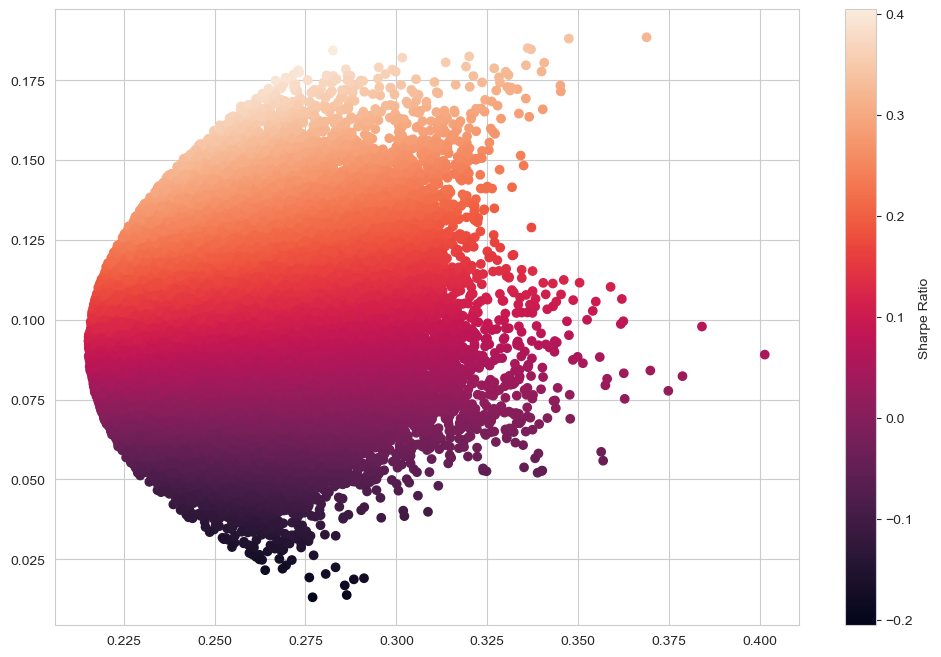

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = sharpe_ratios, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")

plt.show()

THE CURVE IS ALMOST A PERFECT HYPERBOLA!

This is also called the "Markowitz Bullet"

The upper part of the curve is referred to as the "Efficient Frontier"


The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk.

First let's find out the Portfolio with the maximum Sharpe Ratio

In [32]:
ind = 0
for i in range(len(sharpe_ratios)):
    if(sharpe_ratios[i] == np.amax(sharpe_ratios)):
        ind = i

In [33]:
print("Maximum Sharpe Ratio = ",sharpe_ratios[ind])
print("Corresponding Return =  ",portfolio_returns[ind])
print("Corresponding Risk =  ",portfolio_risks[ind])

Maximum Sharpe Ratio =  0.4047230616419141
Corresponding Return =   0.18435740206877432
Corresponding Risk =   0.28255716786891194


SO HERE WE HAVE OUR MAX SHARPE RATIO PORTFOLIO

In [34]:
for i in range(len(stocks)):
    print(stocks[i], ':', portfolio_weights[ind][i])

GHCL.NS : 0.5319783190473177
IDFCFIRSTB.NS : 0.002116173447014294
TATAMOTORS.NS : 0.006595407377843798
NH.NS : 0.4577117585894043
EMAMILTD.NS : 0.0015983415384198277


Plotting the point of our portfolio with max sharpe

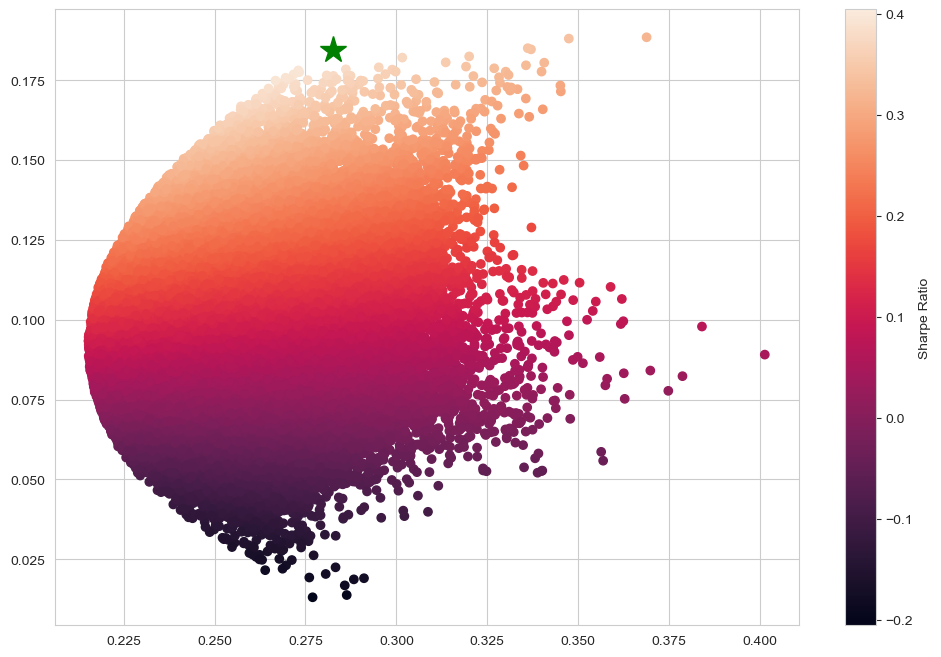

In [35]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = sharpe_ratios, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.plot(portfolio_risks[ind],portfolio_returns[ind], 'g*',markersize = 20.0)
plt.show()

Now let's make a minimum risk portfolio

In [36]:
ind = 0
for i in range(len(portfolio_risks)):
    if(portfolio_risks[i] == np.amin(portfolio_risks)):
        ind = i                                

In [37]:
print("Minimum Risk = ",portfolio_risks[ind])
print("Corresponding Return =  ",portfolio_returns[ind])

Minimum Risk =  0.21532734159995398
Corresponding Return =   0.09337461875030084


In [38]:
for i in range(len(stocks)):
    print(stocks[i], ':', portfolio_weights[ind][i])

GHCL.NS : 0.1136083631174342
IDFCFIRSTB.NS : 0.11484880230371299
TATAMOTORS.NS : 0.05776729920014309
NH.NS : 0.3815285432436156
EMAMILTD.NS : 0.332246992135094


As we can see, this portfolio is very very different

Also we can see our calculations show us the basics of finance, when the risk is less, the returns are less

Plotting the point of our portfolio with minimum risk

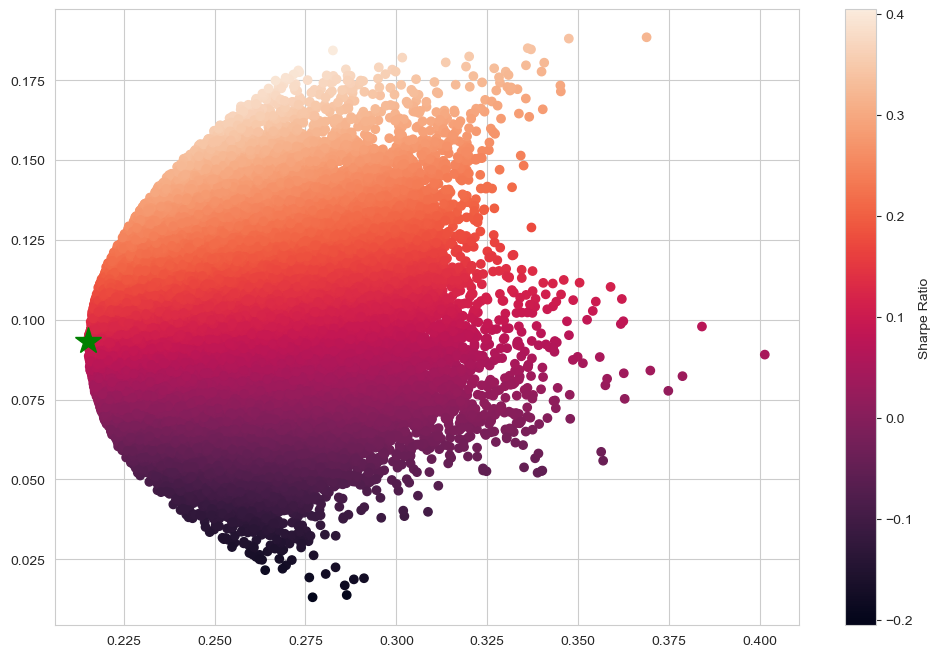

In [39]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = sharpe_ratios, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.plot(portfolio_risks[ind],portfolio_returns[ind], 'g*',markersize = 20.0)

plt.show()

We can see the star is at the turning point of the hyperbola, as it signifies the point where the portfolio has least risk